In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data')

In [ ]:
df

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:
print(df.isnull().sum())

0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.32.2    0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.778     0
0.43      0
0.44      0
3.756     0
61        0
278       0
1         0
dtype: int64


In [ ]:
print(df['1'].unique())

[1 0]


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y=df.pop('1')
x=df

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=10)

In [ ]:
clf = LogisticRegression(random_state=0, max_iter=100000).fit(xtrain, ytrain)
clf.score(xtest,ytest)

0.922463768115942

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(clf, xtrain, ytrain, cv=5)
print(scores.mean(),"  .",scores.std())
print(min(scores),"  .",max(scores))

0.922360248447205   . 0.011825734636434642
0.9037267080745341   . 0.937888198757764


In [ ]:
scores = cross_val_score(clf, xtrain, ytrain, cv=10)
print(scores.mean(),"  .",scores.std())
print(min(scores),"  .",max(scores))

0.9229813664596274   . 0.014945601758404916
0.8881987577639752   . 0.937888198757764


In [ ]:
scores = cross_val_score(clf, xtrain, ytrain, cv=30)
print(scores.mean(),"  .",scores.std())
print(min(scores),"  .",max(scores))

0.9254817122418366   . 0.021967732111678698
0.8703703703703703   . 0.9537037037037037


In [ ]:
scores = cross_val_score(clf, xtrain, ytrain, cv=50)
print(scores.mean(),"  .",scores.std())
print(min(scores),"  .",max(scores))

0.9258269230769232   . 0.03204651182450819
0.8615384615384616   . 0.984375


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
acc=[]
num=[]
for i in range(1,20):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(xtrain, ytrain)
  ypred = neigh.predict(xtest)
  acc.append(metrics.accuracy_score(ytest, ypred))
  num.append(i)

Text(0, 0.5, 'Accuracy')

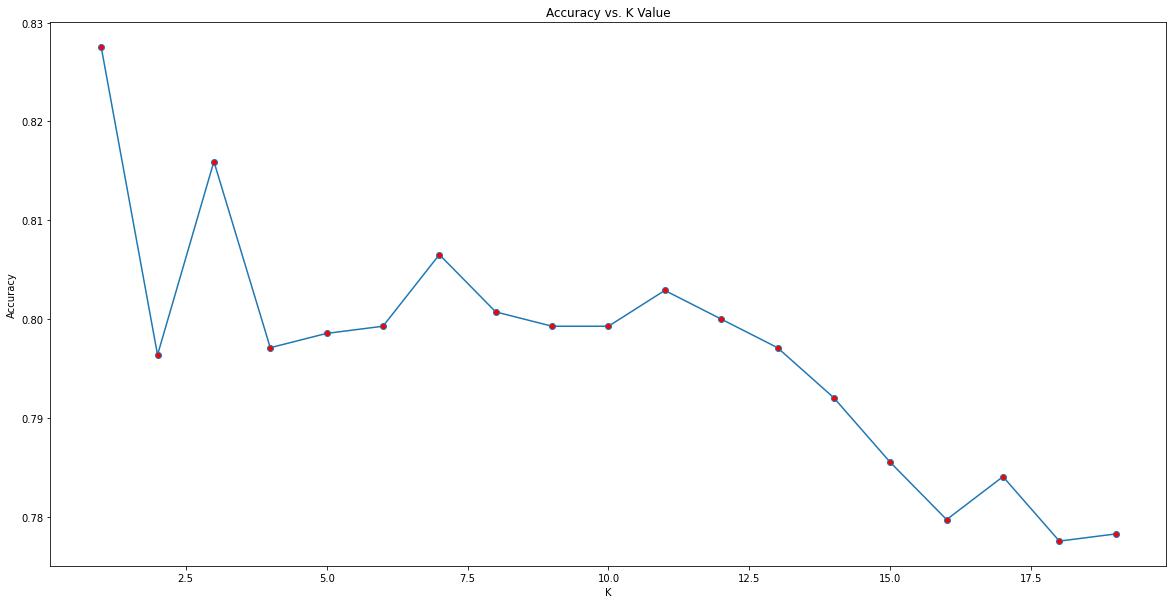

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(range(1,20),acc,marker='o',markerfacecolor='red')
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(xtrain, ytrain)
ypred = neigh.predict(xtest)
print(metrics.accuracy_score(ytest, ypred))
print(neigh.score(xtest,ytest))

0.8159420289855073
0.8159420289855073


In [ ]:
scores = cross_val_score(neigh, xtrain, ytrain, cv=5)
print(scores.mean(),"  .",scores.std())
print(min(scores),"  .",max(scores))

0.7807453416149068   . 0.008750933418388453
0.7670807453416149   . 0.7903726708074534


In [ ]:
scores = cross_val_score(neigh, xtrain, ytrain, cv=10)
print(scores.mean(),"  .",scores.std())
print(min(scores),"  .",max(scores))

0.7928571428571428   . 0.01614010740395813
0.7670807453416149   . 0.8260869565217391


In [ ]:
scores = cross_val_score(neigh, xtrain, ytrain, cv=30)
print(scores.mean(),"  .",scores.std())
print(min(scores),"  .",max(scores))

0.7937521633783315   . 0.02865866810427143
0.7476635514018691   . 0.8518518518518519


In [ ]:
scores = cross_val_score(neigh, xtrain, ytrain, cv=50)
print(scores.mean(),"  .",scores.std())
print(min(scores),"  .",max(scores))

0.7943653846153846   . 0.03794122698176296
0.71875   . 0.890625
